In [16]:
"""
Thibaud Cazanave for Notüv team
Tech Challenge with Circulor

05/07/2021


"""



'\nThibaud Cazanave for Notüv team\nTech Challenge with Circulor\n\n05/07/2021\n\n\n'

'\nThibaud Cazanave for Notüv team\nTech Challenge with Circulor\n\n05/07/2021\n\n\n'

We are going to rely on the following link 

https://www.wisdomgeek.com/development/machine-learning/sarima-forecast-seasonal-data-using-python/



In [17]:
### Import existing Python modules


import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm

# Data

In [18]:
"""
Data import 

We are using the shampoo sale data set as an example here. The data set might be found on this link:
https://machinelearningmastery.com/time-series-datasets-for-machine-learning/
"""

data=pd.read_csv('C:\\Users\\Utilisateur\\Desktop\\TUM\\Tech Challenge\\Shampoo_data_set.csv',sep=";")


"""

This part is not part of the solution itself : the example data set has to be transformed so that the
French time encoding fit with Python grammar

"""


from datetime import date
from time import strptime


data["Date"]=pd.to_datetime(data["Month"])
ts_month_avg=data["Month"].copy()

data["Day"]=""
data["Month"]=""
data["Year"]=""

for j in range(len(data)):
    data.loc[j,"Day"]= data.loc[j,"Date"].day
    data.loc[j,"Month"]= data.loc[j,"Date"].month
    data.loc[j,"Year"]= data.loc[j,"Date"].year
    
data["Date"]=data["Year"].astype(str)+'-'+data["Day"].astype(str)+'-'+data["Month"].astype(str)
data["Date"]=pd.to_datetime(data["Date"])
data.sort_values(by = 'Date',inplace=True) 
data.head()

,Month,Sales,Date,Day,Year
0,1,266.0,2021-01-01,1,2021
12,2,194.3,2021-01-02,1,2021
24,3,339.7,2021-01-03,1,2021
1,1,145.9,2021-02-01,2,2021
13,2,149.5,2021-02-02,2,2021


,Month,Sales,Date,Day,Year
0,1,266.0,2021-01-01,1,2021
12,2,194.3,2021-01-02,1,2021
24,3,339.7,2021-01-03,1,2021
1,1,145.9,2021-02-01,2,2021
13,2,149.5,2021-02-02,2,2021


In [19]:
data=pd.read_csv('C:\\Users\\Utilisateur\\Desktop\\Ensae\\2A Ensae\\S2\\Série temporelle\\Projet série temp\\valeurs_mensuelles.csv',sep=";")
del data["Typologie"]

data["Date"]=pd.to_datetime(data["Date"])
data.rename(columns={"Indice":"Sales"},inplace=True)
ts_month_avg=data["Date"].copy()
data

,Date,Sales
0,1990-01-01,75.09
1,1990-02-01,70.78
2,1990-03-01,73.85
3,1990-04-01,80.16
4,1990-05-01,76.83
...,...,...
356,2019-09-01,96.07
357,2019-10-01,95.19
358,2019-11-01,97.12
359,2019-12-01,93.56


,Date,Sales
0,1990-01-01,75.09
1,1990-02-01,70.78
2,1990-03-01,73.85
3,1990-04-01,80.16
4,1990-05-01,76.83
...,...,...
356,2019-09-01,96.07
357,2019-10-01,95.19
358,2019-11-01,97.12
359,2019-12-01,93.56


# Visualisation of the time series

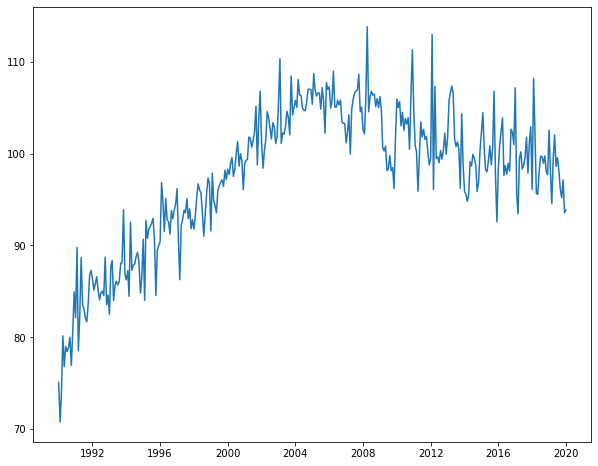

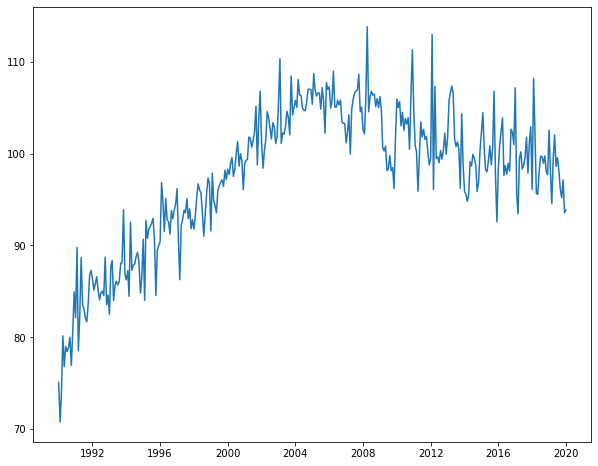

In [20]:
plt.plot(data["Date"],data["Sales"])

# Methodology

1) Plot the series – to check for outliers (done above)

2) Transform the data (to make mean and variance constant)

3) Apply statistical tests to check if the series is stationary (Both trend and seasonality)

4) If non-stationary (has either trend or seasonality), make it stationary by differencing

5) Plot ACF of stationary series for MA order, Seasonal MA order at seasonal spikes

6) Plot PACF of stationary series for AR order, Seasonal AR order at seasonal spikes

7) Run SARIMA with those parameters

8) Check for model validity using residual plots


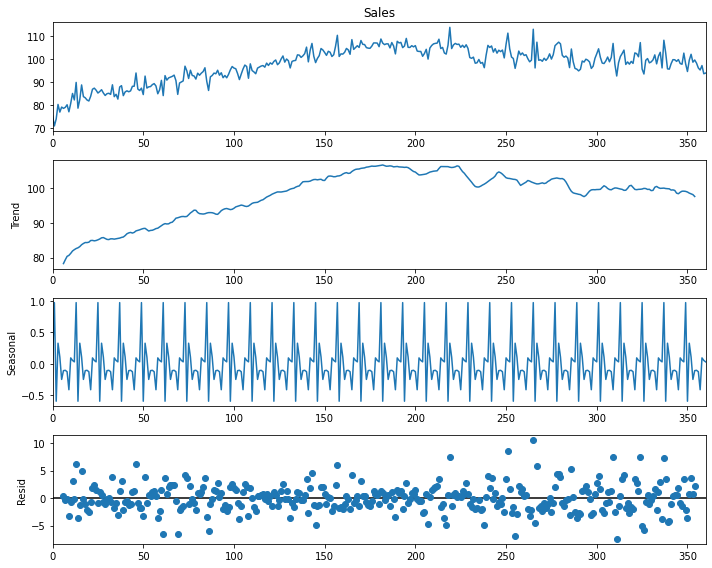

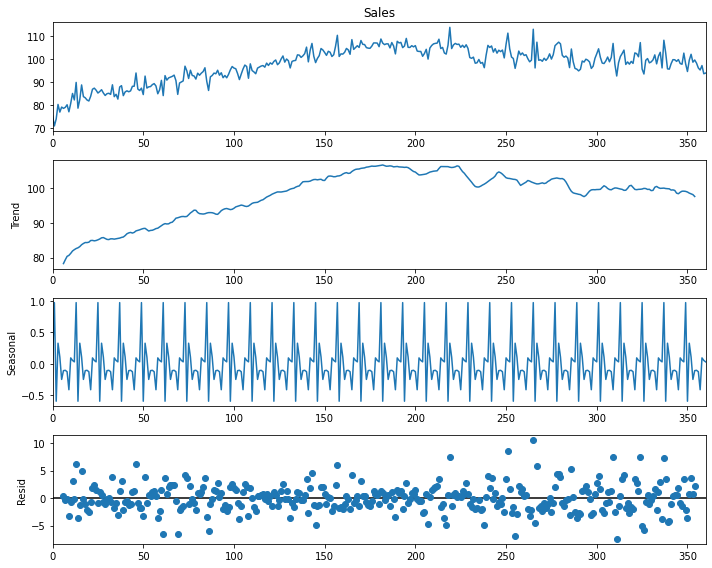

In [21]:
### We create a pandas serie for the values that we want to model thanks to SARIMA

data.reset_index(inplace=True)
#ts_month_avg=data.loc[0:12,"Sales"].astype(float)
ts_month_avg=data.loc[:,"Sales"].astype(float)
ts_month_avg.head()

### Simple visualization

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='additive',period=12)
fig = decomposition.plot()
plt.show()

# SARIMA: meaning of the parameters

The standard SARIMA model equation implies the following parameters : 

SARIMA(p,d,q)x(P,D,Q)lag



The parameters for these types of models are as follows:

p and seasonal P: indicate the number of AR terms (lags of the stationary series)

d and seasonal D: indicate differencing that must be done to stationary series

q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)

lag: indicates the seasonal length in the data


In [22]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    """
     How to interpret the results: if the p-value is less than the critical value, 
     the series is stationary
    
    """
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(ts_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                  -2.671621
p-value                          0.079079
#Lags Used                      13.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -2.671621
p-value                          0.079079
#Lags Used                      13.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -2.671621
p-value                          0.079079
#Lags Used                      13.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -8.108663e+00
p-value                        1.242871e-12
#Lags Used                     1.200000e+01
Number of Observations Used    3.470000e+02
Critical Value (1%)           -3.449337e+00
Critical Value (5%)           -2.869906e+00
Critical Value (10%)          -2.571227e+00
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -2.671621
p-value                          0.079079
#Lags Used                      13.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Valu

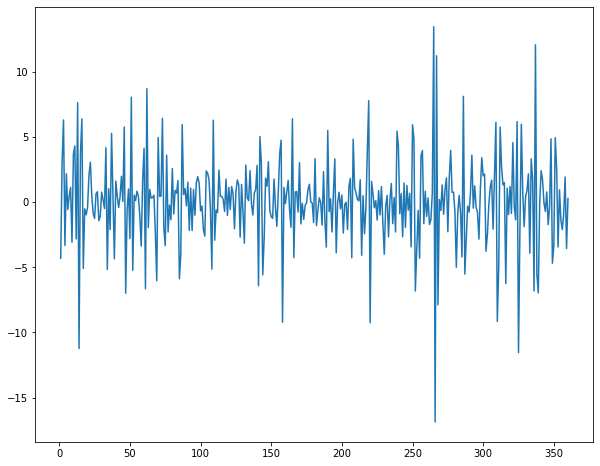

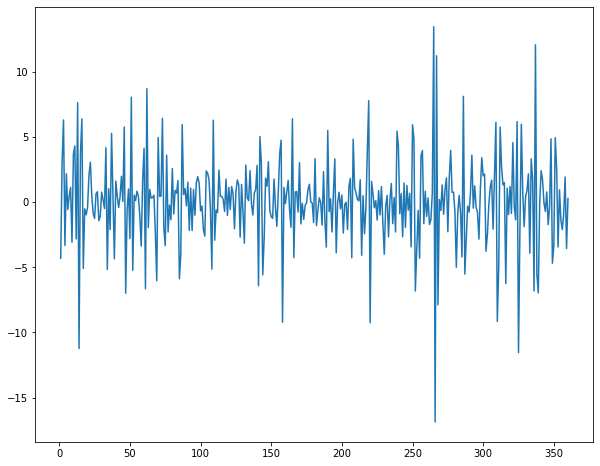

In [23]:
### Trend differentiation

ts_t_adj = ts_month_avg - ts_month_avg.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

print(adf_test(ts_month_avg))
print(adf_test(ts_t_adj))

Results of Dickey-Fuller Test:
Test Statistic                -8.161276e+00
p-value                        9.129681e-13
#Lags Used                     1.700000e+01
Number of Observations Used    3.300000e+02
Critical Value (1%)           -3.450322e+00
Critical Value (5%)           -2.870338e+00
Critical Value (10%)          -2.571458e+00
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -8.161276e+00
p-value                        9.129681e-13
#Lags Used                     1.700000e+01
Number of Observations Used    3.300000e+02
Critical Value (1%)           -3.450322e+00
Critical Value (5%)           -2.870338e+00
Critical Value (10%)          -2.571458e+00
dtype: float64
None


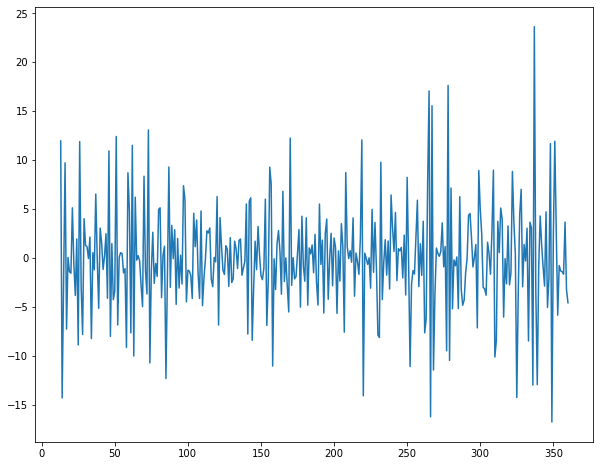

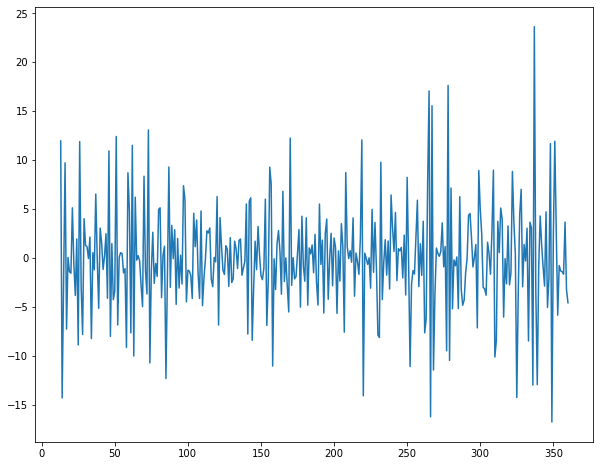

In [24]:
### Seasonal differentiation

ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()
print(adf_test(ts_s_adj))

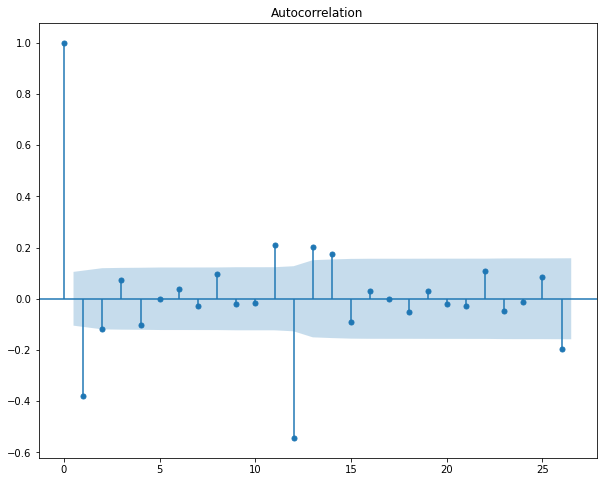

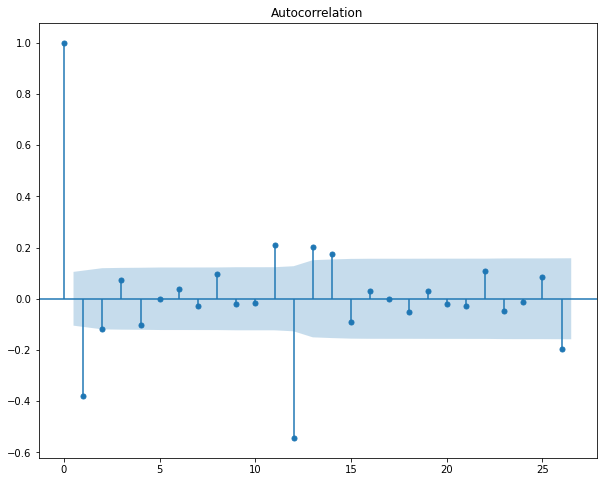

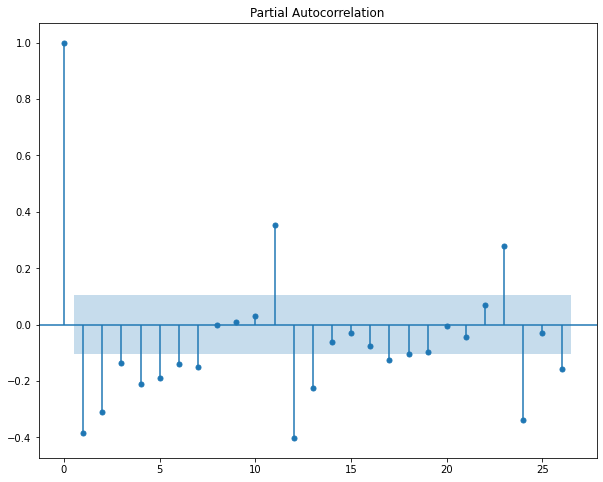

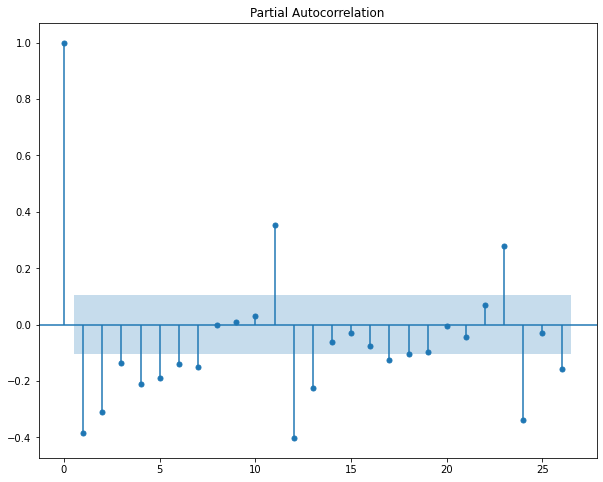

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    
plot_acf(ts_s_adj)
matplotlib.pyplot.show()
plot_pacf(ts_s_adj)
matplotlib.pyplot.show()

In [26]:
Optimization_results={}
Optimization_results["AIC"]=np.inf
Optimization_results

{'AIC': inf}

{'AIC': inf}

In [ ]:
y=ts_s_adj


p = range(0,5)
d = range(0,5)
q = range(0,5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]



"""
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
"""

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            if results.aicOptimization_results["AIC"]:
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                Optimization_results["AIC"]=results.aic
                Optimization_results["Parameter"]=param
                Optimization_results["Seasonal parameter"]=param_seasonal
                
            else:   
                continue
        except:
            continue

C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:1586.605650440752
ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:1586.605650440752


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

ARIMA(0, 0, 0)x(0, 1, 4, 12)12 - AIC:1583.7485943865704
ARIMA(0, 0, 0)x(0, 1, 4, 12)12 - AIC:1583.7485943865704


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

ARIMA(0, 0, 0)x(1, 0, 4, 12)12 - AIC:1573.9743857341186
ARIMA(0, 0, 0)x(1, 0, 4, 12)12 - AIC:1573.9743857341186


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

ARIMA(0, 0, 0)x(2, 0, 4, 12)12 - AIC:1554.8805855495593
ARIMA(0, 0, 0)x(2, 0, 4, 12)12 - AIC:1554.8805855495593


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: 

ARIMA(0, 0, 0)x(3, 0, 4, 12)12 - AIC:1553.9366644646534
ARIMA(0, 0, 0)x(3, 0, 4, 12)12 - AIC:1553.9366644646534


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

In [ ]:
Optimization_results

# Forecasting

In [29]:
y_forecasted = pred.predicted_mean
y_truth = ts_s_adj['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

NameError: name 'pred' is not defined

NameError: name 'pred' is not defined